<a href="https://colab.research.google.com/github/Niharika626/PD_DETECTION/blob/main/SVM_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Gait_Data___Arm_swing_13Apr2024 (1)(1).csv to Gait_Data___Arm_swing_13Apr2024 (1)(1).csv


In [2]:
#SVM
#importing the necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
print("Libraries imported")

Libraries imported


In [3]:
parkinson_data = pd.read_csv("Gait_Data___Arm_swing_13Apr2024 (1)(1).csv")
parkinson_data.head(10) #printing first 10 rows of dataframe

,PATNO,EVENT_ID,INFODT,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,42443,V06,11/2018,1.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,42443,V04,11/2017,1.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,42438,V06,10/2018,3.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,42426,V06,12/2018,1.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,42426,BL,11/2016,1.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053
5,42422,V06,12/2018,1.0,1.563,61.052068,51.465144,18.543469,11.587096,0.207511,...,0.585938,1.296875,0.615345,1.256410,9.398438,10.333984,0.578125,1.128906,0.639181,1.080505
6,42422,BL,11/2016,1.0,1.143,38.314673,33.248165,7.560887,8.128498,0.168624,...,0.625000,1.437500,0.381887,0.737591,7.562500,6.070312,0.609375,1.269531,0.491730,0.733162
7,42418,V04,03/2018,3.0,1.042,22.526788,43.909882,8.733026,6.224986,0.479479,...,0.625000,2.820312,0.411788,1.137831,13.687500,12.632812,0.609375,2.761719,0.656651,1.349639
8,40621,NaN,12/2017,NaN,1.500,51.613331,37.382977,2.566866,3.752649,0.383879,...,0.625000,2.507812,0.503161,0.854427,9.640625,7.667969,0.656250,2.210938,0.762715,1.158379
9,42418,BL,02/2017,3.0,0.964,15.610665,36.560067,4.258304,3.149224,0.569155,...,0.617188,2.472656,0.527426,2.056776,11.101562,8.835938,0.585938,2.457031,0.484080,1.557265


In [4]:
print(parkinson_data.columns)

Index(['PATNO', 'EVENT_ID', 'INFODT', 'COHORT', 'SP_U', 'RA_AMP_U', 'LA_AMP_U',
       'RA_STD_U', 'LA_STD_U', 'SYM_U', 'R_JERK_U', 'L_JERK_U', 'ASA_U',
       'ASYM_IND_U', 'TRA_U', 'T_AMP_U', 'CAD_U', 'STR_T_U', 'STR_CV_U',
       'STEP_REG_U', 'STEP_SYM_U', 'JERK_T_U', 'SP__DT', 'RA_AMP_DT',
       'LA_AMP_DT', 'RA_STD_DT', 'LA_STD_DT', 'SYM_DT', 'R_JERK_DT',
       'L_JERK_DT', 'ASA_DT', 'ASYM_IND_DT', 'TRA_DT', 'T_AMP_DT', 'CAD_DT',
       'STR_T_DT', 'STR_CV_DT', 'STEP_REG_DT', 'STEP_SYM_DT', 'JERK_T_DT',
       'SW_VEL_OP', 'SW_PATH_OP', 'SW_FREQ_OP', 'SW_JERK_OP', 'SW_VEL_CL',
       'SW_PATH_CL', 'SW_FREQ_CL', 'SW_JERK_CL', 'TUG1_DUR', 'TUG1_STEP_NUM',
       'TUG1_STRAIGHT_DUR', 'TUG1_TURNS_DUR', 'TUG1_STEP_REG', 'TUG1_STEP_SYM',
       'TUG2_DUR', 'TUG2_STEP_NUM', 'TUG2_STRAIGHT_DUR', 'TUG2_TURNS_DUR',
       'TUG2_STEP_REG', 'TUG2_STEP_SYM'],
      dtype='object')


In [5]:
import pandas as pd

# Create a sample DataFrame


# Select the important features
important_features = ['COHORT','TUG1_DUR','TUG1_STEP_NUM','TUG1_STRAIGHT_DUR','TUG1_TURNS_DUR','TUG1_STEP_REG','TUG1_STEP_SYM','SW_FREQ_OP','SW_PATH_OP','SW_JERK_OP','TUG2_DUR','TUG2_STEP_NUM','TUG2_STRAIGHT_DUR','TUG2_TURNS_DUR','TUG2_STEP_REG','TUG2_STEP_SYM','RA_AMP_U','LA_AMP_U','RA_STD_U','LA_STD_U','R_JERK_U','L_JERK_U']


# Delete the other features
parkinson_data= parkinson_data[important_features]

# Print the reduced DataFrame
print(parkinson_data)

     COHORT   TUG1_DUR  TUG1_STEP_NUM  TUG1_STRAIGHT_DUR  TUG1_TURNS_DUR  \
0       1.0  10.679688      11.603516           0.554688        1.625000   
1       1.0   8.828125      10.854492           0.507812        1.312500   
2       3.0  15.398438      17.244141           0.593750        2.152344   
3       1.0  10.109375      10.029297           0.632812        1.804688   
4       1.0   8.875000       7.782227           0.632812        1.710938   
..      ...        ...            ...                ...             ...   
187     NaN        NaN            NaN                NaN             NaN   
188     NaN  10.500000      10.800781           0.601562        1.753906   
189     NaN  10.507812      10.664062           0.554688        2.171875   
190     NaN        NaN            NaN                NaN             NaN   
191     NaN   8.726562       7.875000           0.546875        1.480469   

     TUG1_STEP_REG  TUG1_STEP_SYM  SW_FREQ_OP  SW_PATH_OP  SW_JERK_OP  ...  \
0        

In [6]:
parkinson_data.describe()

,COHORT,TUG1_DUR,TUG1_STEP_NUM,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,SW_FREQ_OP,SW_PATH_OP,SW_JERK_OP,...,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,R_JERK_U,L_JERK_U
count,167.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,183.000000,183.000000,183.000000,...,180.000000,180.000000,180.000000,180.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.113772,11.359417,12.046624,1.690048,1.812458,0.550445,1.372682,0.741337,4.205392,0.679618,...,1.853906,1.786176,0.550877,1.276224,30.434434,32.363124,4.594693,4.639543,0.025448,0.028947
std,0.996495,2.469043,3.985675,2.575842,0.425001,0.135654,1.059463,0.306733,1.874418,1.620412,...,3.028928,0.448903,0.128075,0.569977,16.059061,16.998849,2.518370,2.949671,0.042599,0.061282
min,1.000000,6.515625,5.414062,0.390625,0.914062,0.099709,0.246550,0.000767,1.741396,0.067901,...,0.421875,1.003906,0.036212,0.051935,2.764410,3.838619,1.345954,1.238529,0.000872,0.001000
25%,1.000000,9.710938,9.635742,0.539062,1.482422,0.475502,1.026296,0.571436,3.167730,0.238331,...,0.531250,1.466797,0.486500,1.019786,18.334562,21.352457,2.766709,2.844636,0.003968,0.005812
50%,3.000000,11.148438,11.908203,0.585938,1.750000,0.570403,1.204816,0.697049,3.765705,0.323716,...,0.582031,1.720703,0.557808,1.158086,29.782323,31.306657,3.949317,3.700150,0.009639,0.010689
75%,3.000000,12.335938,13.936035,0.640625,2.099609,0.653225,1.444203,0.904539,4.683507,0.547286,...,0.642578,2.071289,0.641894,1.362094,41.144615,41.771080,6.036549,5.591410,0.027716,0.026297
max,3.000000,24.054688,32.638672,11.710938,3.027344,0.831344,13.390026,1.900496,15.192847,16.534032,...,14.242188,3.492188,0.798386,5.936446,78.376934,79.697780,18.543469,18.263038,0.264852,0.644772


In [7]:
parkinson_data = parkinson_data.dropna()

In [8]:
parkinson_data.shape #rows and columns in dataset

(142, 22)

In [9]:
parkinson_data.describe() #statistical data about the dataset

,COHORT,TUG1_DUR,TUG1_STEP_NUM,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,SW_FREQ_OP,SW_PATH_OP,SW_JERK_OP,...,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,R_JERK_U,L_JERK_U
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2.056338,11.437665,12.204996,1.860750,1.827905,0.559424,1.418018,0.744902,4.119964,0.688489,...,2.059639,1.798553,0.565411,1.222425,30.129694,32.848254,4.586248,4.567215,0.021129,0.024342
std,1.001946,2.505457,3.738184,2.737306,0.440741,0.125087,1.171762,0.299873,1.916086,1.788633,...,3.253978,0.458672,0.117178,0.393249,15.744087,17.351235,2.522324,2.730359,0.038426,0.060316
min,1.000000,6.539062,5.693359,0.429688,1.050781,0.231198,0.436354,0.002226,1.741396,0.067901,...,0.421875,1.003906,0.192810,0.648452,2.764410,3.838619,1.345954,1.454332,0.000872,0.001000
25%,1.000000,9.787109,9.986816,0.533203,1.460938,0.480372,1.037311,0.566774,3.126673,0.237418,...,0.523438,1.473633,0.496263,1.016458,18.472496,22.034905,2.762636,2.842787,0.003412,0.005386
50%,3.000000,11.218750,12.236328,0.585938,1.765625,0.574995,1.209964,0.680328,3.649072,0.314282,...,0.574219,1.724609,0.570383,1.131580,30.312349,31.435273,4.072221,3.689933,0.008108,0.009310
75%,3.000000,12.455078,13.898682,0.640625,2.143555,0.659951,1.445983,0.920446,4.634919,0.521124,...,0.640625,2.081055,0.645102,1.348308,41.157034,42.199053,6.055580,5.581406,0.023195,0.020153
max,3.000000,24.054688,32.638672,11.710938,3.027344,0.831344,13.390026,1.900496,15.192847,16.534032,...,14.242188,3.492188,0.798386,3.334641,78.376934,79.697780,18.543469,18.263038,0.264852,0.644772


In [10]:
parkinson_data.isnull().sum() #checking for missing values


,0
COHORT,0
TUG1_DUR,0
TUG1_STEP_NUM,0
TUG1_STRAIGHT_DUR,0
TUG1_TURNS_DUR,0
TUG1_STEP_REG,0
TUG1_STEP_SYM,0
SW_FREQ_OP,0
SW_PATH_OP,0
SW_JERK_OP,0


In [11]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 184
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COHORT             142 non-null    float64
 1   TUG1_DUR           142 non-null    float64
 2   TUG1_STEP_NUM      142 non-null    float64
 3   TUG1_STRAIGHT_DUR  142 non-null    float64
 4   TUG1_TURNS_DUR     142 non-null    float64
 5   TUG1_STEP_REG      142 non-null    float64
 6   TUG1_STEP_SYM      142 non-null    float64
 7   SW_FREQ_OP         142 non-null    float64
 8   SW_PATH_OP         142 non-null    float64
 9   SW_JERK_OP         142 non-null    float64
 10  TUG2_DUR           142 non-null    float64
 11  TUG2_STEP_NUM      142 non-null    float64
 12  TUG2_STRAIGHT_DUR  142 non-null    float64
 13  TUG2_TURNS_DUR     142 non-null    float64
 14  TUG2_STEP_REG      142 non-null    float64
 15  TUG2_STEP_SYM      142 non-null    float64
 16  RA_AMP_U           142 non-null

In [12]:
parkinson_data.corr()

,COHORT,TUG1_DUR,TUG1_STEP_NUM,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,SW_FREQ_OP,SW_PATH_OP,SW_JERK_OP,...,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,R_JERK_U,L_JERK_U
COHORT,1.000000,0.313307,0.234514,-0.000534,0.457621,-0.209020,0.062837,0.062666,0.027107,0.016677,...,0.047533,0.476932,-0.249054,0.044740,-0.264165,-0.241658,-0.272078,-0.245199,0.008140,-0.124265
TUG1_DUR,0.313307,1.000000,0.799867,0.181792,0.570011,-0.133919,-0.069435,0.166204,0.020106,0.069050,...,0.193259,0.560044,-0.241504,0.045944,-0.419308,-0.272497,-0.220486,-0.216080,-0.090750,-0.026412
TUG1_STEP_NUM,0.234514,0.799867,1.000000,0.157767,0.253077,-0.096091,0.018353,0.254824,0.006244,0.055190,...,0.147134,0.264481,-0.193248,0.027385,-0.246083,-0.131411,-0.084674,-0.034082,-0.045725,-0.045512
TUG1_STRAIGHT_DUR,-0.000534,0.181792,0.157767,1.000000,-0.081868,0.066611,-0.077421,0.192612,0.130296,0.109064,...,0.969842,0.163390,-0.147991,0.026609,0.068807,0.091158,0.020601,-0.091162,-0.193851,-0.128965
TUG1_TURNS_DUR,0.457621,0.570011,0.253077,-0.081868,1.000000,-0.098866,-0.005780,-0.048492,-0.041460,-0.028898,...,-0.043033,0.696488,-0.131212,0.037099,-0.346207,-0.350602,-0.353231,-0.264766,0.038436,0.002205
TUG1_STEP_REG,-0.209020,-0.133919,-0.096091,0.066611,-0.098866,1.000000,-0.110958,0.195855,-0.119551,-0.129700,...,0.098567,-0.074295,0.555765,0.056798,0.123656,0.197899,0.141765,0.057477,-0.192660,0.040469
TUG1_STEP_SYM,0.062837,-0.069435,0.018353,-0.077421,-0.005780,-0.110958,1.000000,0.037948,0.123991,0.020152,...,-0.065877,-0.031067,0.090498,0.062171,0.034814,0.037290,0.082218,0.136405,-0.051912,-0.016336
SW_FREQ_OP,0.062666,0.166204,0.254824,0.192612,-0.048492,0.195855,0.037948,1.000000,0.198372,0.068730,...,0.208549,-0.001083,0.037325,-0.036277,0.132385,0.172026,0.255272,0.024903,-0.180670,-0.083444
SW_PATH_OP,0.027107,0.020106,0.006244,0.130296,-0.041460,-0.119551,0.123991,0.198372,1.000000,0.808625,...,0.090408,-0.011658,0.053580,-0.098228,0.050814,0.177483,0.091609,-0.005719,-0.071824,-0.053583
SW_JERK_OP,0.016677,0.069050,0.055190,0.109064,-0.028898,-0.129700,0.020152,0.068730,0.808625,1.000000,...,0.045533,-0.019883,0.056700,-0.068505,-0.039576,0.079371,-0.016577,-0.016264,-0.056601,-0.040724


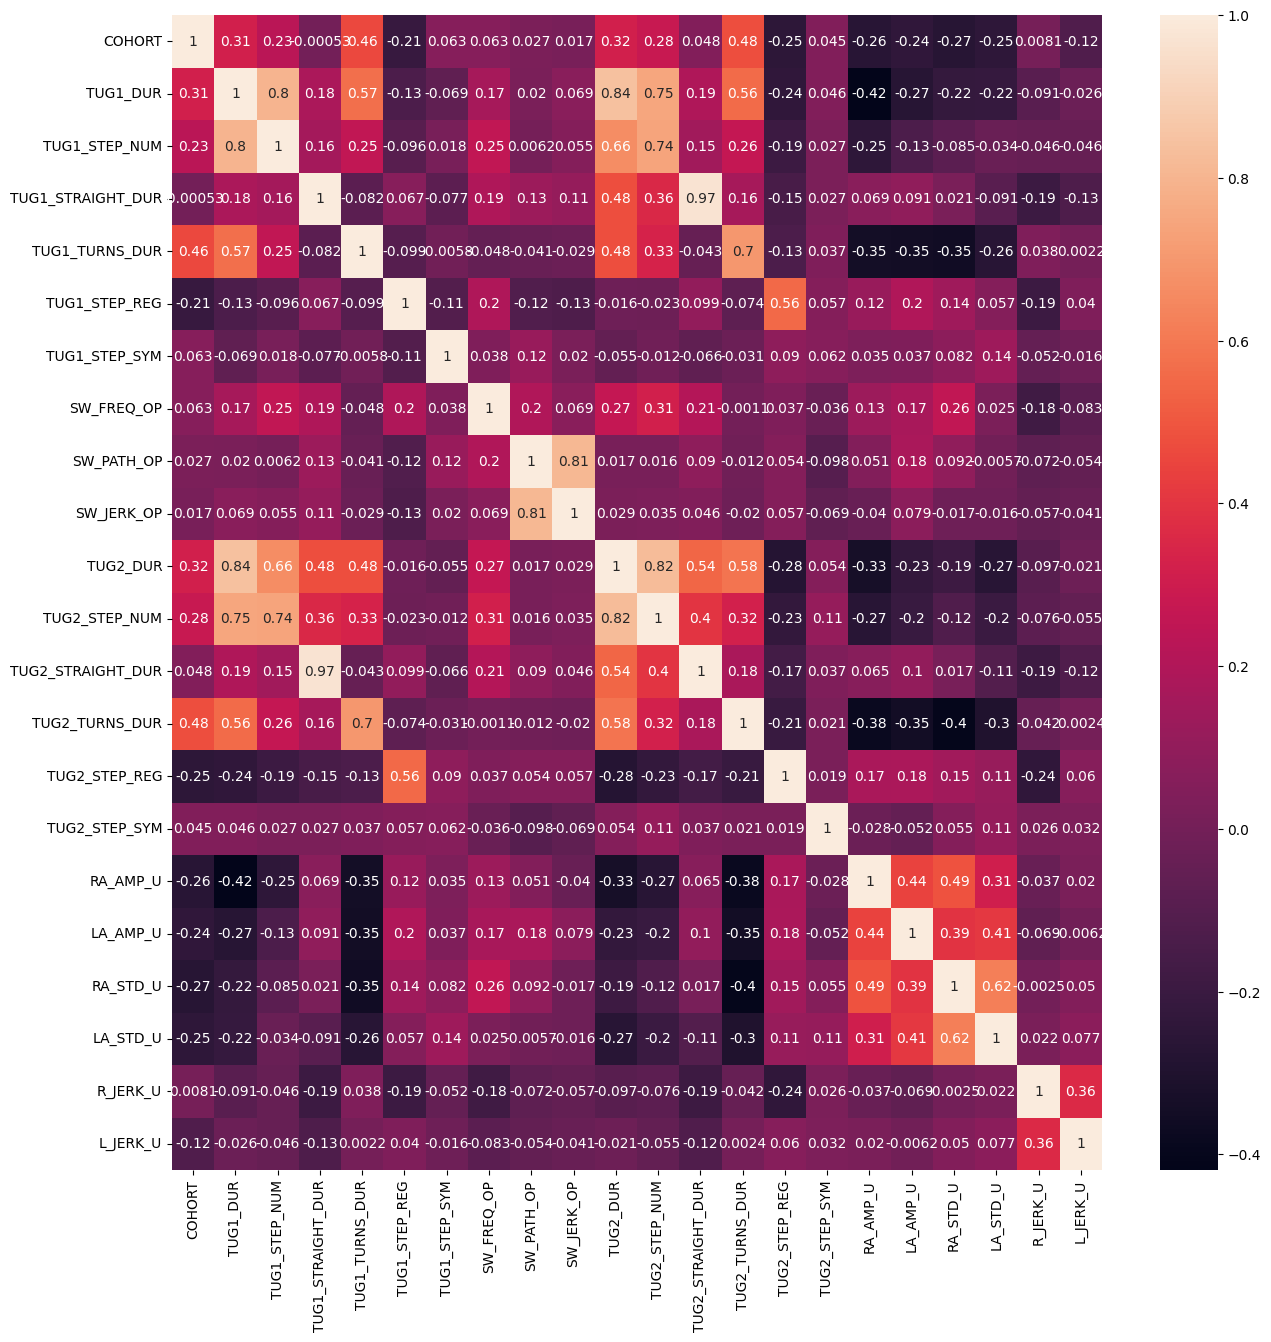

In [13]:
plt.figure(figsize=(15,15))
p = sns.heatmap(parkinson_data.corr(), annot=True)

In [14]:
#replacing 3 with 0
parkinson_data["COHORT"] = parkinson_data["COHORT"].replace({3: 0})

In [15]:

# target variable = status
parkinson_data['COHORT'].value_counts()

,count
COHORT,
0.0,75
1.0,67


In [16]:
parkinson_data.groupby('COHORT').mean()

,TUG1_DUR,TUG1_STEP_NUM,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,SW_FREQ_OP,SW_PATH_OP,SW_JERK_OP,TUG2_DUR,...,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,R_JERK_U,L_JERK_U
COHORT,,,,,,,,,,,,,,,,,,,,,
0.0,12.176979,13.030658,1.859375,2.017865,0.534800,1.487365,0.762601,4.168881,0.716583,12.126979,...,2.205312,2.004583,0.537925,1.238995,26.212597,28.899099,3.939899,3.936678,0.021423,0.017283
1.0,10.610075,11.280747,1.862290,1.615264,0.586989,1.340392,0.725090,4.065206,0.657041,10.310634,...,1.896572,1.567922,0.596179,1.203876,34.514504,37.268951,5.309773,5.273041,0.020799,0.032244


In [17]:
#features and labels assigning
X = parkinson_data.drop(columns=['COHORT'], axis=1) #dropping column axis = 1; dropping row then axis = 0
Y = parkinson_data['COHORT']

In [18]:
print(X)

      TUG1_DUR  TUG1_STEP_NUM  TUG1_STRAIGHT_DUR  TUG1_TURNS_DUR  \
0    10.679688      11.603516           0.554688        1.625000   
1     8.828125      10.854492           0.507812        1.312500   
2    15.398438      17.244141           0.593750        2.152344   
3    10.109375      10.029297           0.632812        1.804688   
4     8.875000       7.782227           0.632812        1.710938   
..         ...            ...                ...             ...   
179  15.140625      17.671875           8.835938        2.503906   
180  13.343750      12.656250           8.437500        2.027344   
182  12.203125      10.097656           0.648438        2.054688   
183  10.007812       9.064453           0.585938        1.886719   
184   7.562500       6.685547           0.609375        1.808594   

     TUG1_STEP_REG  TUG1_STEP_SYM  SW_FREQ_OP  SW_PATH_OP  SW_JERK_OP  \
0         0.612586       1.421568    0.606840    3.362521    0.264631   
1         0.605626       1.284985    

In [19]:
print(Y)

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
179    1.0
180    0.0
182    1.0
183    1.0
184    1.0
Name: COHORT, Length: 142, dtype: float64


In [20]:
#splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(142, 21) (113, 21) (29, 21)


In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [26]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(X_train)

[[ 7.41778951e-01  6.64107356e-01  2.13204088e+00 ... -8.64872369e-01
  -4.75695430e-01 -1.58065555e-01]
 [-8.44429690e-01 -6.21754686e-01 -4.80190804e-01 ... -7.52267337e-01
   5.67783211e-03  1.33994426e-01]
 [ 6.50374268e-02  1.31548635e-01  1.89510376e+00 ... -6.93113771e-01
  -3.53794676e-01 -1.39908179e-01]
 ...
 [ 5.21302075e-01  7.51251276e-02 -4.62420520e-01 ... -1.04943416e+00
   1.57511538e-02 -3.43439145e-01]
 [-1.18693304e-01 -1.11963345e-01 -4.44650237e-01 ... -6.53864322e-01
   5.84948000e+00  2.60643637e+00]
 [ 1.09086734e+00  1.66442120e-01 -4.59458806e-01 ... -6.51018483e-01
   2.91285647e-01  2.88656643e-01]]


In [28]:
X_train.shape

(113, 21)

In [29]:
from sklearn.svm import SVC

In [30]:
from sklearn import svm

In [31]:
#Initialise svm and Train the Model
model = svm.SVC(C=1,coef0=1.0, degree=4,gamma='auto',kernel='linear')

In [32]:
X_train_df = pd.DataFrame(X_train)

In [33]:
missing_values = X_train_df.isnull().sum()

In [34]:
print(missing_values)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [35]:
import pandas as pd

X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)

In [36]:
from sklearn import svm
print(X_train.isnull().sum())
print(Y_train.isnull().sum())


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64
COHORT    0
dtype: int64


In [37]:
# Drop rows with missing values
X_train.dropna(inplace=True)
Y_train.dropna(inplace=True)

# OR

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

In [38]:
X_train.shape

(113, 21)

In [39]:
X_train


array([[ 7.41778951e-01,  6.64107356e-01,  2.13204088e+00, ...,
        -8.64872369e-01, -4.75695430e-01, -1.58065555e-01],
       [-8.44429690e-01, -6.21754686e-01, -4.80190804e-01, ...,
        -7.52267337e-01,  5.67783211e-03,  1.33994426e-01],
       [ 6.50374268e-02,  1.31548635e-01,  1.89510376e+00, ...,
        -6.93113771e-01, -3.53794676e-01, -1.39908179e-01],
       ...,
       [ 5.21302075e-01,  7.51251276e-02, -4.62420520e-01, ...,
        -1.04943416e+00,  1.57511538e-02, -3.43439145e-01],
       [-1.18693304e-01, -1.11963345e-01, -4.44650237e-01, ...,
        -6.53864322e-01,  5.84948000e+00,  2.60643637e+00],
       [ 1.09086734e+00,  1.66442120e-01, -4.59458806e-01, ...,
        -6.51018483e-01,  2.91285647e-01,  2.88656643e-01]])

In [40]:
Y_train

,COHORT
144,0.0
93,1.0
140,0.0
164,0.0
6,1.0
...,...
106,0.0
14,0.0
112,0.0
125,0.0


In [41]:
Y_train.shape


(113, 1)

In [42]:
if X_train.shape[0] > Y_train.shape[0]:
    X_train = X_train[:Y_train.shape[0]]
elif Y_train.shape[0] > X_train.shape[0]:
    Y_train = Y_train[:X_train.shape[0]]

In [43]:
# training the SVM model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, coef0=1.0, degree=4, gamma='auto', kernel='linear')

In [44]:
# Accuracy Score on training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_pred)

SVM ALGORITHM  Training data Accuracy

In [45]:
# Training data Accuracy
print('Accuracy (Training Data) :', training_data_accuracy*100, '%')

Accuracy (Training Data) : 83.1858407079646 %


In [46]:
X_test = pd.DataFrame(X_test)

In [47]:
# Option 1: Drop rows with missing values
X_test = X_test.dropna()

# Option 2: Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)

In [48]:
Y_test.shape

(29,)

In [49]:
# Accuracy Score on test data
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_pred)

In [50]:
# testing data accuracy
print('Accuracy (Testing Data) :', testing_data_accuracy*100, '%')


Accuracy (Testing Data) : 79.3103448275862 %


In [51]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,X_test_pred)
print("Mean squared error:", mse)

Mean squared error: 0.20689655172413793


In [52]:
from sklearn.linear_model import Ridge

# Define the model with a regularization parameter (alpha)
model = Ridge(alpha=0.1)

# Train the model on your data
model.fit(X_train, Y_train)

# Make predictions on your test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.18542106174052608


In [53]:
import numpy as np

def predict_parkinsons_status(features):
  """Predicts Parkinson's status (COHORT) based on given features.

  Args:
    features: A list or numpy array containing the feature values in the
              following order:
              ['TUG1_DUR', 'TUG1_STEP_NUM', 'TUG1_STRAIGHT_DUR',
               'TUG1_TURNS_DUR', 'TUG1_STEP_REG', 'TUG1_STEP_SYM',
               'SW_FREQ_OP', 'SW_PATH_OP', 'SW_JERK_OP', 'TUG2_DUR',
               'TUG2_STEP_NUM', 'TUG2_STRAIGHT_DUR', 'TUG2_TURNS_DUR',
               'TUG2_STEP_REG', 'TUG2_STEP_SYM', 'RA_AMP_U', 'LA_AMP_U',
               'RA_STD_U', 'LA_STD_U', 'R_JERK_U', 'L_JERK_U']

  Returns:
    The predicted COHORT value (0 or 1).
  """
  # Reshape features to a 2D array
  features = np.array(features).reshape(1, -1)

  # Apply scaling using the previously fitted scaler
  features_scaled = scaler.transform(features)

  # Make the prediction using the trained model
  prediction = model.predict(features_scaled)[0]

  return prediction

# Example usage:
feature_values = [10.5, 12, 5.2, 3.3, 0.8, 0.7, 1.2, 0.9, 0.5,
                  9.8, 11, 4.9, 3.1, 0.85, 0.75, 2.1, 1.9,
                  0.3, 0.25, 0.6, 0.55]  # Replace with your actual feature values

predicted_cohort = predict_parkinsons_status(feature_values)

print("Predicted COHORT:", predicted_cohort)

Predicted COHORT: [-0.06323044]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SVM ALGORITHM Testing Data accuracy